In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# accuracy plots

Index([u'iter', u'k', u'algo', u'totaltime', u'relerr'], dtype='object')


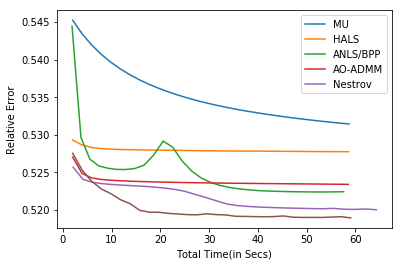

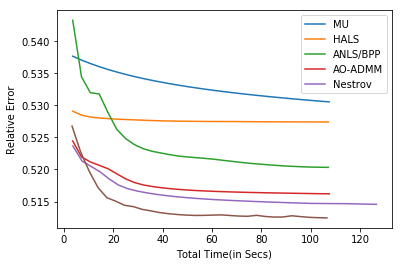

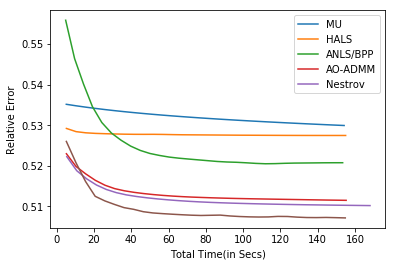

In [3]:
frame=pd.read_csv('accuracyrwksweep.dat', delimiter='\t', header=0)
print frame.columns
# frame_subset=frame[[u'k',u'totaltime',u'algo',u'relerr',u'gpu']]
frame_subset=frame[[u'k',u'totaltime',u'algo',u'relerr']]
for lowrank in [32, 64, 96]:
    #frame_k=frame_subset.loc[(frame_subset['k']==lowrank) & frame_subset['gpu']==1]
    frame_k=frame_subset.loc[(frame_subset['k']==lowrank)]
    fig, ax = plt.subplots()
    for key, grp in frame_k.groupby(['algo']):
        ax = grp.plot(ax=ax, kind='line', x='totaltime', y='relerr', label=key)
    plt.legend(['MU','HALS','ANLS/BPP','AO-ADMM','Nestrov'],loc='best')
    plt.ylabel('Relative Error')
    plt.xlabel('Total Time(in Secs)')
    plt.show()
    fig.savefig('plots/accuracyrw'+str(lowrank)+'.pdf')
    

# Timing Comparison between CPU vs GPU

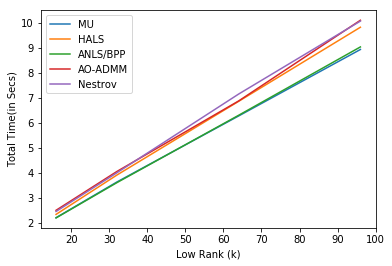

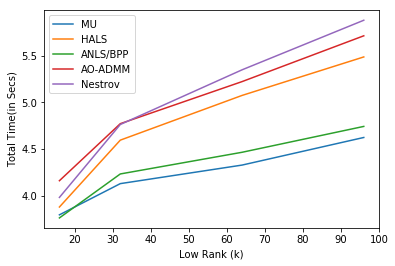

In [41]:
frame=pd.read_csv('accuracylr81pksweep.csv', delimiter='\t', header=0)
frame_subset=frame[[u'iter',u'k',u'totaltime',u'algo',u'gpu']]
for gpu in [0, 1]:
    #frame_k=frame_subset.loc[(frame_subset['k']==lowrank) & frame_subset['gpu']==1]
    frame_k=frame_subset.loc[(frame_subset['gpu']==gpu) & (frame_subset['iter']==29)]
    fig, ax = plt.subplots()
    for key, grp in frame_k.groupby(['algo']):
        ax = grp.plot(ax=ax, kind='line', x='k', y='totaltime', label=key)
    plt.legend(['MU','HALS','ANLS/BPP','AO-ADMM','Nestrov'],loc='best')
    plt.xlabel('Low Rank (k)')
    plt.ylabel('Total Time(in Secs)')
    plt.show()
    fig.savefig('plots/cpuvsgpulr81'+str(gpu)+'.pdf')

# LUC Comparison

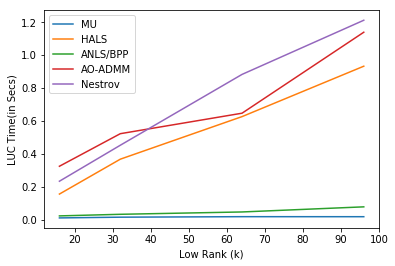

In [43]:
frame=pd.read_csv('luclr81pksweep.csv', delimiter='\t', header=0)
fig, ax = plt.subplots()
for key, grp in frame.groupby(['algo']):
    ax = grp.plot(ax=ax, kind='line', x='k', y='nnls', label=key)
plt.legend(['MU','HALS','ANLS/BPP','AO-ADMM','Nestrov'],loc='best')
plt.xlabel('Low Rank (k)')
plt.ylabel('LUC Time(in Secs)')
plt.show()
fig.savefig('plots/luclr81'+'.pdf')

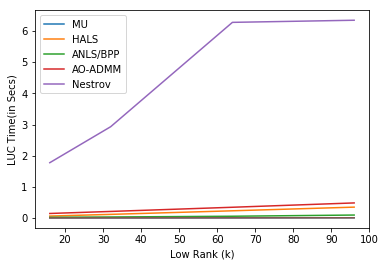

In [44]:
frame=pd.read_csv('lucrwp64ksweep.csv', delimiter='\t', header=0)
fig, ax = plt.subplots()
for key, grp in frame.groupby(['algo']):
    ax = grp.plot(ax=ax, kind='line', x='k', y='nnls', label=key)
plt.legend(['MU','HALS','ANLS/BPP','AO-ADMM','Nestrov'],loc='best')
plt.xlabel('Low Rank (k)')
plt.ylabel('LUC Time(in Secs)')
plt.show()
fig.savefig('plots/lucrw64'+'.pdf')